In [1]:
from time import time, sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# use get request to download webpage
url="https://www.nasdaq.com/screening/companies-by-industry.aspx?industry=Technology&sortname=marketcap&sorttype=1&page="
response=get(url)
print(response.text[:500])


<!doctype html>
<html lang="en-us" class="inner no-js" xmlns:og="https://ogp.me/ns#" xmlns:fb="https://www.facebook.com/2008/fbml">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','


In [3]:
#parsing the html
page_html=BeautifulSoup(response.text, 'html.parser')

In [4]:
#Select all the stocks in the first page
data=[]
stable=page_html.find('table', attrs={'id':'CompanylistResults'})
print(stable)

<table id="CompanylistResults">
<thead>
<tr>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=name&amp;sorttype=0" rel="nofollow">Name</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=symbol&amp;sorttype=0" rel="nofollow">Symbol</a></th>
<th style="" valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=marketcap&amp;sorttype=0" rel="nofollow">Market Cap</a></th>
<th style="display:none" valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=adrtso&amp;sorttype=0" rel="nofollow">ADR TSO</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=country&amp;sorttype=0" rel="nofollow">Country</a></th>
<th valign="top" width="50"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=ipoyear&amp;sorttype=0" rel="nofollow">IPO Year</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Tec

In [5]:
rows=stable.find_all('tr')
print (rows)

[<tr>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=name&amp;sorttype=0" rel="nofollow">Name</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=symbol&amp;sorttype=0" rel="nofollow">Symbol</a></th>
<th style="" valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=marketcap&amp;sorttype=0" rel="nofollow">Market Cap</a></th>
<th style="display:none" valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=adrtso&amp;sorttype=0" rel="nofollow">ADR TSO</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=country&amp;sorttype=0" rel="nofollow">Country</a></th>
<th valign="top" width="50"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=ipoyear&amp;sorttype=0" rel="nofollow">IPO Year</a></th>
<th valign="top"><a href="companies-by-industry.aspx?industry=Technology&amp;sortname=industry&amp;sortt

In [6]:
for row in rows:
    cols=row.find_all('td')
    #print(cols)
    cols=[ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) #Get rid of empty values
print (data)

[[], ['Microsoft Corporation', 'MSFT', '$945.21B', 'United States', '1986', 'Computer Software: Prepackaged Software'], ['MSFT Stock Quote\n\n\r\n\t\t\t\t                MSFT Ratings\n\n\r\n\t\t\t\t                MSFT Stock Report'], ['Apple Inc.', 'AAPL', '$854.51B', 'United States', '1980', 'Computer Manufacturing'], ['AAPL Stock Quote\n\n\r\n\t\t\t\t                AAPL Ratings\n\n\r\n\t\t\t\t                AAPL Stock Report'], ['Alphabet Inc.', 'GOOGL', '$789.07B', 'United States', 'n/a', 'Computer Software: Programming, Data Processing'], ['GOOGL Stock Quote\n\n\r\n\t\t\t\t                GOOGL Ratings\n\n\r\n\t\t\t\t                GOOGL Stock Report'], ['Alphabet Inc.', 'GOOG', '$785.9B', 'United States', '2004', 'Computer Software: Programming, Data Processing'], ['GOOG Stock Quote\n\n\r\n\t\t\t\t                GOOG Ratings\n\n\r\n\t\t\t\t                GOOG Stock Report'], ['Facebook, Inc.', 'FB', '$518.2B', 'United States', '2012', 'Computer Software: Programming, Data Pr

In [7]:
#Assign to dataframe for visualization
import pandas as pd
import numpy as np
stocks=pd.DataFrame(list(data))
stocks.columns=['Name', 'Symbol', 'Market Cap', 'Country', 'IPO Year', 'Sector', 'Sub Sector']
stocks.head(20)


,Name,Symbol,Market Cap,Country,IPO Year,Sector,Sub Sector
0,None,None,None,None,None,None,None
1,Microsoft Corporation,MSFT,$945.21B,United States,1986,Computer Software: Prepackaged Software,None
2,MSFT Stock Quote\n\n\r\n\t\t\t\t ...,None,None,None,None,None,None
3,Apple Inc.,AAPL,$854.51B,United States,1980,Computer Manufacturing,None
4,AAPL Stock Quote\n\n\r\n\t\t\t\t ...,None,None,None,None,None,None
5,Alphabet Inc.,GOOGL,$789.07B,United States,n/a,"Computer Software: Programming, Data Processing",None
6,GOOGL Stock Quote\n\n\r\n\t\t\t\t ...,None,None,None,None,None,None
7,Alphabet Inc.,GOOG,$785.9B,United States,2004,"Computer Software: Programming, Data Processing",None
8,GOOG Stock Quote\n\n\r\n\t\t\t\t ...,None,None,None,None,None,None
9,"Facebook, Inc.",FB,$518.2B,United States,2012,"Computer Software: Programming, Data Processing",None


In [8]:
# Remove all None rows, these are row headings
stocks_df=stocks[stocks['Country'].map(lambda x: str(x)!="None")]
stocks_df.head()

,Name,Symbol,Market Cap,Country,IPO Year,Sector,Sub Sector
1,Microsoft Corporation,MSFT,$945.21B,United States,1986,Computer Software: Prepackaged Software,None
3,Apple Inc.,AAPL,$854.51B,United States,1980,Computer Manufacturing,None
5,Alphabet Inc.,GOOGL,$789.07B,United States,n/a,"Computer Software: Programming, Data Processing",None
7,Alphabet Inc.,GOOG,$785.9B,United States,2004,"Computer Software: Programming, Data Processing",None
9,"Facebook, Inc.",FB,$518.2B,United States,2012,"Computer Software: Programming, Data Processing",None


In [9]:
# Visualizaions using pandas
stocks_df.describe()

,Name,Symbol,Market Cap,Country,IPO Year,Sector,Sub Sector
count,50,50,50,50,50,50,1
unique,49,50,50,11,22,9,1
top,Alphabet Inc.,UBER,$28.01B,United States,n/a,Computer Software: Prepackaged Software,"Computer Software: Programming, Data Processing"
freq,2,1,1,37,21,15,1


In [10]:
#Using pandas profiling to show more info
import pandas_profiling
pandas_profiling.ProfileReport(stocks_df)

Number of variables,8
Number of observations,50
Total Missing (%),12.2%
Total size in memory,3.2 KiB
Average record size in memory,65.6 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),2
Rejected,0


Text(0, 0.5, 'No. Of IPOs')

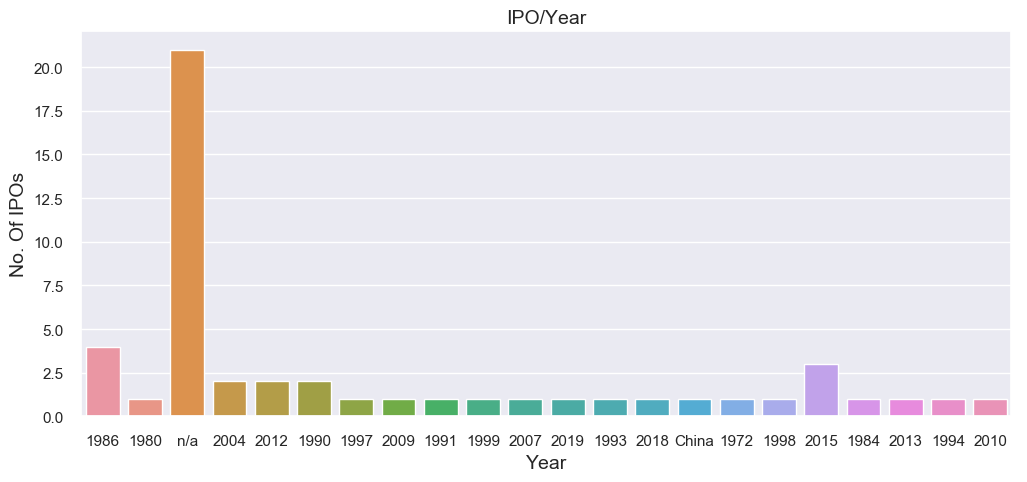

In [11]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.countplot(x=stocks_df['IPO Year'] )
plt.title('IPO/Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. Of IPOs', fontsize=14)

Text(0, 0.5, 'No. Of Companies')

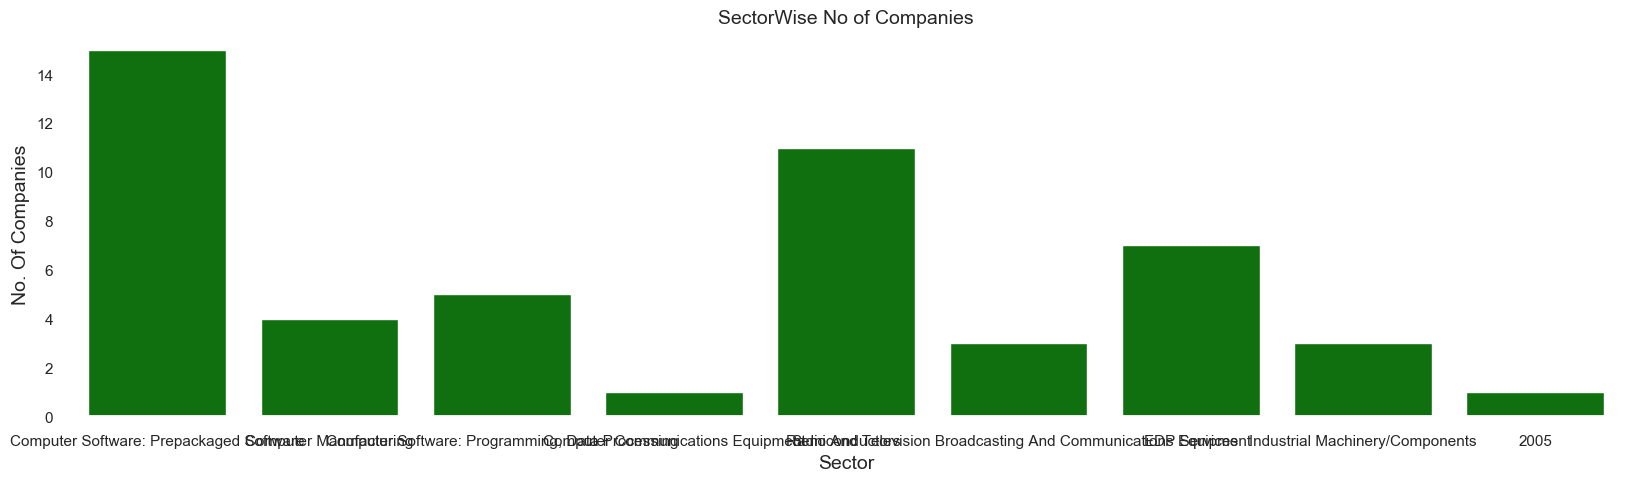

In [12]:
plt.figure(figsize=(20,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'red'})
sns.countplot(x=stocks_df['Sector'], color='green')
plt.title('SectorWise No of Companies', fontsize=14)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('No. Of Companies', fontsize=14)

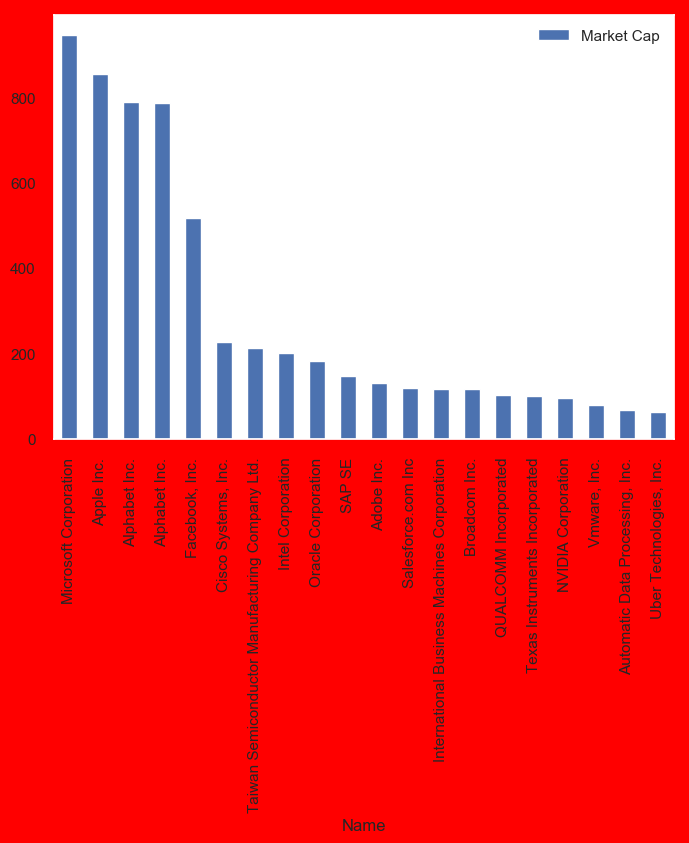

In [13]:
#Top 20 market capitalization
#Remove dollar and 'B' first
stocks_df['Market Cap']=stocks_df['Market Cap'].apply(lambda x: x.replace('$',''))
stocks_df['Market Cap']=stocks_df['Market Cap'].apply(lambda x: x.replace('B',''))
stocks_df['Market Cap']=stocks_df['Market Cap'].astype('float').fillna(0.0)
top20=stocks_df.sort_values(by='Market Cap', ascending=False).head(20)
top20.set_index("Name",drop=True,inplace=True)
top20.plot(kind='bar')